In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
import numpy as np
import pandas as pd
%cd "/content/gdrive/My Drive/thesis/Data"

#csv import labels

train_ACL_labels = np.array(pd.read_csv("train-acl.csv", header=None).iloc[:,1])
train_abnormal_labels = np.array(pd.read_csv("train-abnormal.csv", header=None).iloc[:,1])
train_meniscus_labels = np.array(pd.read_csv("train-meniscus.csv", header=None).iloc[:,1])

valid_ACL_labels = np.array(pd.read_csv("valid-acl.csv", header=None).iloc[:,1])
valid_abnormal_labels = np.array(pd.read_csv("valid-abnormal.csv", header=None).iloc[:,1])
valid_meniscus_labels = np.array(pd.read_csv("valid-meniscus.csv", header=None).iloc[:,1])

test_ACL_labels = np.array(pd.read_csv("test-acl.csv", header=None).iloc[:,1])
test_abnormal_labels = np.array(pd.read_csv("test-abnormal.csv", header=None).iloc[:,1])
test_meniscus_labels = np.array(pd.read_csv("test-meniscus.csv", header=None).iloc[:,1])

#data path
train_path = "/content/gdrive/My Drive/thesis/Data/train"
train_axial_path = "/content/gdrive/My Drive/thesis/Data/train/coronal"

counter = 5
for filename in os.listdir(train_axial_path):
  if counter > 0:
    file0 = np.load(train_axial_path + '/' + filename)
    variancelist = []
    for slice in range(file0.shape[0]):
      variancelist.append(np.var(file0[slice,:,:]))
    #print(file0)
    #print('max', np.amax(file0))
    #print('mean', np.mean(file0)
    #print(filename, 'file shape', file0.shape, 'max_var_index', variancelist.index(max(variancelist)), max(variancelist))
    counter = counter - 1

print(valid_ACL_labels)
print("done!")

/content/gdrive/My Drive/thesis/Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0]
done!


In [0]:
# Grabbing Prediction Values + Features
# First three Columns are reserved for prediction, rest of 256x3 are features
# axial, coronal, sagittal order.

X_train_ACL = np.zeros((len(train_ACL_labels), 771))
X_train_meniscus = np.zeros((len(train_ACL_labels), 771))
X_train_abnormal = np.zeros((len(train_ACL_labels), 771))

X_valid_ACL = np.zeros((len(valid_ACL_labels), 771))
X_valid_meniscus = np.zeros((len(valid_ACL_labels), 771))
X_valid_abnormal = np.zeros((len(valid_ACL_labels), 771))

X_test_ACL = np.zeros((len(test_ACL_labels), 771))
X_test_meniscus = np.zeros((len(test_ACL_labels), 771))
X_test_abnormal = np.zeros((len(test_ACL_labels), 771))

Y_train_ACL = np.array(train_ACL_labels)
Y_train_meniscus = np.array(train_meniscus_labels)
Y_train_abnormal = np.array(train_abnormal_labels)

Y_valid_ACL = np.array(valid_ACL_labels)
Y_valid_meniscus = np.array(valid_meniscus_labels)
Y_valid_abnormal = np.array(valid_abnormal_labels)

Y_test_ACL = np.array(test_ACL_labels)
Y_test_meniscus = np.array(test_meniscus_labels)
Y_test_abnormal = np.array(test_abnormal_labels)

In [0]:
# Grab Prediction Values
prediction_path = "/content/gdrive/My Drive/thesis/Results/model_predictions/"

X_train_ACL[:,0] = np.load(prediction_path + 'ACL/train/axial/predictions.npy')
X_train_ACL[:,1] = np.load(prediction_path + 'ACL/train/coronal/predictions.npy')
X_train_ACL[:,2] = np.load(prediction_path + 'ACL/train/sagittal/predictions.npy')

X_valid_ACL[:,0] = np.load(prediction_path + 'ACL/valid/axial/predictions.npy')
X_valid_ACL[:,1] = np.load(prediction_path + 'ACL/valid/coronal/predictions.npy')
X_valid_ACL[:,2] = np.load(prediction_path + 'ACL/valid/sagittal/predictions.npy')

X_test_ACL[:,0] = np.load(prediction_path + 'ACL/test/axial/predictions.npy')
X_test_ACL[:,1] = np.load(prediction_path + 'ACL/test/coronal/predictions.npy')
X_test_ACL[:,2] = np.load(prediction_path + 'ACL/test/sagittal/predictions.npy')

X_train_meniscus[:,0] = np.load(prediction_path + 'meniscus/train/axial/predictions.npy')
X_train_meniscus[:,1] = np.load(prediction_path + 'meniscus/train/coronal/predictions.npy')
X_train_meniscus[:,2] = np.load(prediction_path + 'meniscus/train/sagittal/predictions.npy')

X_valid_meniscus[:,0] = np.load(prediction_path + 'meniscus/valid/axial/predictions.npy')
X_valid_meniscus[:,1] = np.load(prediction_path + 'meniscus/valid/coronal/predictions.npy')
X_valid_meniscus[:,2] = np.load(prediction_path + 'meniscus/valid/sagittal/predictions.npy')

X_test_meniscus[:,0] = np.load(prediction_path + 'meniscus/test/axial/predictions.npy')
X_test_meniscus[:,1] = np.load(prediction_path + 'meniscus/test/coronal/predictions.npy')
X_test_meniscus[:,2] = np.load(prediction_path + 'meniscus/test/sagittal/predictions.npy')

X_train_abnormal[:,0] = np.load(prediction_path + 'abnormal/train/axial/predictions.npy')
X_train_abnormal[:,1] = np.load(prediction_path + 'abnormal/train/coronal/predictions.npy')
X_train_abnormal[:,2] = np.load(prediction_path + 'abnormal/train/sagittal/predictions.npy')

X_valid_abnormal[:,0] = np.load(prediction_path + 'abnormal/valid/axial/predictions.npy')
X_valid_abnormal[:,1] = np.load(prediction_path + 'abnormal/valid/coronal/predictions.npy')
X_valid_abnormal[:,2] = np.load(prediction_path + 'abnormal/valid/sagittal/predictions.npy')

X_test_abnormal[:,0] = np.load(prediction_path + 'abnormal/test/axial/predictions.npy')
X_test_abnormal[:,1] = np.load(prediction_path + 'abnormal/test/coronal/predictions.npy')
X_test_abnormal[:,2] = np.load(prediction_path + 'abnormal/test/sagittal/predictions.npy')

In [5]:
print(X_test_abnormal[0:10,0])

import torch
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

print(sigmoid(10.3914))

[0.05813657 0.999946   0.99959654 0.08737165 0.32876843 0.17634426
 0.82082319 0.05518856 0.99554968 0.99999893]
0.9999693056111859


In [0]:
def extract_number(string):
  strlist = string.split()
  xd = strlist[0].split('[')
  xd2 = xd[2].split(']')
  xd3 = float(xd2[0])
  return xd3

In [7]:
# Grab Features
# Match Feature Array With Prediction Value
feature_path = "/content/gdrive/My Drive/thesis/Results/model_features/"

import os

test_list = X_test_abnormal[:,0]
print(test_list)
filelist = []
sigmoidlist = []
for filename in os.listdir(feature_path + "abnormal/test/axial/"):
  filelist.append(filename)

sigmoidlist = [sigmoid(extract_number(i)) for i in filelist]
print(sigmoidlist)

#print(np.load(feature_path + "ACL/train/coronal/tensor([[10.3914]], device='cuda:0', grad_fn=<AddmmBackward>).npy"))

[0.05813657 0.999946   0.99959654 0.08737165 0.32876843 0.17634426
 0.82082319 0.05518856 0.99554968 0.99999893 0.9990108  0.95670003
 0.01443749 0.99999332 0.99924797 0.99434149 0.64814162 0.9986639
 0.99738938 0.42651647 0.20825499 0.98974741 0.86485833 0.99998236
 0.01459791 0.9946596  0.81101644 0.61730635 0.16704136 0.98941845
 0.99978298 0.99984705 0.99997342 0.99991333 0.70759213 0.09780553
 0.999856   0.92664719 0.99954081 0.60389805 0.94490451 0.99999857
 0.93104762 0.99687296 0.99821007 0.99999917 0.97500527 0.98484427
 0.03141411 0.09241697 0.9999876  0.93667537 0.11524022 0.99974221
 0.99999702 0.99962676 0.99999487 0.98538685 0.9998908  0.90695417
 0.85941899 0.99646914 0.88662535 0.99999857 0.90948868 0.9999994
 0.25063682 0.9677031  0.99999344 0.49125537 0.11218417 0.00296568
 0.09154634 0.98211771 0.99370193 0.99998581 0.79457861 0.99999774
 0.9996258  0.87201017 0.99999964 0.00797179 0.38906756 0.90630603
 0.99946696 0.99996865 0.40154034 0.71608436 1.         0.449602

In [8]:
def min_distance(point, alist):
  dist = np.absolute(np.subtract(np.array(alist), point*np.ones(len(alist))))
  min_index = np.argmin(dist)
  return min_index, dist[min_index]

def unique_elements(alist):
  temp = []
  for element in alist:
    if element not in temp:
      temp.append(element)
    else:
      return False
  return True

indices = []

copy_sigmoid_list = sigmoidlist.copy()

print(len(test_list), len(copy_sigmoid_list))

for test in test_list:
  index, distance = min_distance(test, copy_sigmoid_list)
  print(index, distance)
  indices.append(index)
  #copy_sigmoid_list[index] = -100

unique_elements(indices)


##### ISSUE DISCOVERED: SOMETIMES THE FILE GETS OVERWRITTEN IF THE TENSOR IS THE SAME, NEED MORE SIG FIGS

130 130
0 6.296471323496977e-09
1 4.74446071319079e-09
2 4.502670913897333e-08
3 1.934669272007916e-09
4 3.982881136010974e-09
5 8.968031400824472e-09
6 2.2297778845548066e-08
7 2.2251956041663412e-09
8 2.0689394975015318e-08
9 4.299453104650297e-08
10 5.159914351349215e-08
11 4.985878454544235e-08
12 9.422211049575635e-10
13 5.169607675270527e-08
14 7.359080567148624e-09
15 2.120006548089748e-08
16 1.9564189490672845e-08
17 2.074617089231623e-08
18 3.0626525204802135e-08
19 3.973188777983694e-08
20 6.167261090705978e-09
21 4.6515920337775185e-08
22 1.5199615233107977e-08
23 7.669066715010331e-09
24 5.019217680368726e-10
25 5.791680357525308e-09
26 3.374170387537845e-09
27 2.4580854018907417e-08
28 1.2163899831829639e-08
29 3.214269272966419e-08
30 3.416971183778372e-08
31 3.683570526380464e-08
32 4.455510105305649e-08
33 5.738452224512969e-08
34 1.1626367535377824e-08
35 1.1717407738531804e-09
36 5.220731502664222e-08
37 4.55985468272857e-08
38 7.648543343119485e-08
39 1.6362334376296

False

In [0]:
feature_path = "/content/gdrive/My Drive/thesis/Results/model_features/"
ACL_tr_ax = []
ACL_tr_cor = []
ACL_tr_sag = []

for filename in os.listdir(feature_path + "ACL/train/axial/"):
  ACL_tr_ax.append(filename)
for filename in os.listdir(feature_path + "ACL/train/coronal/"):
  ACL_tr_cor.append(filename)
for filename in os.listdir(feature_path + "ACL/train/sagittal/"):
  ACL_tr_sag.append(filename)

for index in range(X_train_ACL.shape[0]):
  axial_features = np.load(feature_path + "ACL/train/axial/" + ACL_tr_ax[index])
  coronal_features = np.load(feature_path + "ACL/train/coronal/" + ACL_tr_cor[index])
  sagittal_features = np.load(feature_path + "ACL/train/sagittal/" + ACL_tr_sag[index])

  features = np.concatenate((axial_features, coronal_features, sagittal_features), axis=1)
  #print(features.shape)
  X_train_ACL[index,3::] = features.squeeze()  

In [0]:
ACL_val_ax = []
ACL_val_cor = []
ACL_val_sag = []

for filename in os.listdir(feature_path + "ACL/valid/axial/"):
  ACL_val_ax.append(filename)
for filename in os.listdir(feature_path + "ACL/valid/coronal/"):
  ACL_val_cor.append(filename)
for filename in os.listdir(feature_path + "ACL/valid/sagittal/"):
  ACL_val_sag.append(filename)

for index in range(X_valid_ACL.shape[0]):
  axial_features = np.load(feature_path + "ACL/valid/axial/" + ACL_val_ax[index])
  coronal_features = np.load(feature_path + "ACL/valid/coronal/" + ACL_val_cor[index])
  sagittal_features = np.load(feature_path + "ACL/valid/sagittal/" + ACL_val_sag[index])

  features = np.concatenate((axial_features, coronal_features, sagittal_features), axis=1)
  #print(features.shape)
  X_valid_ACL[index,3::] = features.squeeze()
  

In [0]:
ACL_te_ax = []
ACL_te_cor = []
ACL_te_sag = []

for filename in os.listdir(feature_path + "ACL/test/axial/"):
  ACL_te_ax.append(filename)
for filename in os.listdir(feature_path + "ACL/test/coronal/"):
  ACL_te_cor.append(filename)
for filename in os.listdir(feature_path + "ACL/test/sagittal/"):
  ACL_te_sag.append(filename)

for index in range(X_test_ACL.shape[0]):
  axial_features = np.load(feature_path + "ACL/test/axial/" + ACL_te_ax[index])
  coronal_features = np.load(feature_path + "ACL/test/coronal/" + ACL_te_cor[index])
  sagittal_features = np.load(feature_path + "ACL/test/sagittal/" + ACL_te_sag[index])

  features = np.concatenate((axial_features, coronal_features, sagittal_features), axis=1)
  #print(features.shape)
  X_test_ACL[index,3::] = features.squeeze()

In [0]:
men_tr_ax = []
men_tr_cor = []
men_tr_sag = []

for filename in os.listdir(feature_path + "meniscus/train/axial/"):
  men_tr_ax.append(filename)
for filename in os.listdir(feature_path + "meniscus/train/coronal/"):
  men_tr_cor.append(filename)
for filename in os.listdir(feature_path + "meniscus/train/sagittal/"):
  men_tr_sag.append(filename)

for index in range(X_train_meniscus.shape[0]):
  axial_features = np.load(feature_path + "meniscus/train/axial/" + men_tr_ax[index])
  coronal_features = np.load(feature_path + "meniscus/train/coronal/" + men_tr_cor[index])
  sagittal_features = np.load(feature_path + "meniscus/train/sagittal/" + men_tr_sag[index])

  features = np.concatenate((axial_features, coronal_features, sagittal_features), axis=1)
  #print(features.shape)
  X_train_meniscus[index,3::] = features.squeeze()  

In [0]:
men_val_ax = []
men_val_cor = []
men_val_sag = []

for filename in os.listdir(feature_path + "meniscus/valid/axial/"):
  men_val_ax.append(filename)
for filename in os.listdir(feature_path + "meniscus/valid/coronal/"):
  men_val_cor.append(filename)
for filename in os.listdir(feature_path + "meniscus/valid/sagittal/"):
  men_val_sag.append(filename)

for index in range(X_valid_meniscus.shape[0]):
  axial_features = np.load(feature_path + "meniscus/valid/axial/" + men_val_ax[index])
  coronal_features = np.load(feature_path + "meniscus/valid/coronal/" + men_val_cor[index])
  sagittal_features = np.load(feature_path + "meniscus/valid/sagittal/" + men_val_sag[index])

  features = np.concatenate((axial_features, coronal_features, sagittal_features), axis=1)
  #print(features.shape)
  X_valid_meniscus[index,3::] = features.squeeze()  

In [0]:
men_te_ax = []
men_te_cor = []
men_te_sag = []

for filename in os.listdir(feature_path + "meniscus/test/axial/"):
  men_te_ax.append(filename)
for filename in os.listdir(feature_path + "meniscus/test/coronal/"):
  men_te_cor.append(filename)
for filename in os.listdir(feature_path + "meniscus/test/sagittal/"):
  men_te_sag.append(filename)

for index in range(X_test_meniscus.shape[0]):
  axial_features = np.load(feature_path + "meniscus/test/axial/" + men_te_ax[index])
  coronal_features = np.load(feature_path + "meniscus/test/coronal/" + men_te_cor[index])
  sagittal_features = np.load(feature_path + "meniscus/test/sagittal/" + men_te_sag[index])

  features = np.concatenate((axial_features, coronal_features, sagittal_features), axis=1)
  #print(features.shape)
  X_test_meniscus[index,3::] = features.squeeze()  

In [0]:
abn_tr_ax = []
abn_tr_cor = []
abn_tr_sag = []

for filename in os.listdir(feature_path + "abnormal/train/axial/"):
  abn_tr_ax.append(filename)
for filename in os.listdir(feature_path + "abnormal/train/coronal/"):
  abn_tr_cor.append(filename)
for filename in os.listdir(feature_path + "abnormal/train/sagittal/"):
  abn_tr_sag.append(filename)

for index in range(X_train_abnormal.shape[0]):
  axial_features = np.load(feature_path + "abnormal/train/axial/" + abn_tr_ax[index])
  coronal_features = np.load(feature_path + "abnormal/train/coronal/" + abn_tr_cor[index])
  sagittal_features = np.load(feature_path + "abnormal/train/sagittal/" + abn_tr_sag[index])

  features = np.concatenate((axial_features, coronal_features, sagittal_features), axis=1)
  #print(features.shape)
  X_train_abnormal[index,3::] = features.squeeze()  

In [0]:
abn_val_ax = []
abn_val_cor = []
abn_val_sag = []

for filename in os.listdir(feature_path + "abnormal/valid/axial/"):
  abn_val_ax.append(filename)
for filename in os.listdir(feature_path + "abnormal/valid/coronal/"):
  abn_val_cor.append(filename)
for filename in os.listdir(feature_path + "abnormal/valid/sagittal/"):
  abn_val_sag.append(filename)

for index in range(X_valid_abnormal.shape[0]):
  axial_features = np.load(feature_path + "abnormal/valid/axial/" + abn_val_ax[index])
  coronal_features = np.load(feature_path + "abnormal/valid/coronal/" + abn_val_cor[index])
  sagittal_features = np.load(feature_path + "abnormal/valid/sagittal/" + abn_val_sag[index])

  features = np.concatenate((axial_features, coronal_features, sagittal_features), axis=1)
  #print(features.shape)
  X_valid_abnormal[index,3::] = features.squeeze()  

In [0]:
abn_te_ax = []
abn_te_cor = []
abn_te_sag = []

for filename in os.listdir(feature_path + "abnormal/test/axial/"):
  abn_te_ax.append(filename)
for filename in os.listdir(feature_path + "abnormal/test/coronal/"):
  abn_te_cor.append(filename)
for filename in os.listdir(feature_path + "abnormal/test/sagittal/"):
  abn_te_sag.append(filename)

for index in range(X_test_abnormal.shape[0]):
  axial_features = np.load(feature_path + "abnormal/test/axial/" + abn_te_ax[index])
  coronal_features = np.load(feature_path + "abnormal/test/coronal/" + abn_te_cor[index])
  sagittal_features = np.load(feature_path + "abnormal/test/sagittal/" + abn_te_sag[index])

  features = np.concatenate((axial_features, coronal_features, sagittal_features), axis=1)
  #print(features.shape)
  X_test_abnormal[index,3::] = features.squeeze()  

CLASSIFIERS

In [0]:
# Random Forest using GridSearch CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

def train_RF(X_train, Y_train, X_valid, Y_valid):
  #n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 10)]
  n_estimators = [1, 2, 3, 4, 5, 10, 20, 50]
  max_features = ['auto', 'sqrt']
  #max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth = [1,2,3,4,5]
  #max_depth.append(None)
  #min_samples_split = [2, 5, 10]
  #min_samples_leaf = [1, 2, 4]
  #bootstrap = [True, False]
  random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth
                #'min_samples_split': min_samples_split,
                #'min_samples_leaf': min_samples_leaf,
                #'bootstrap': bootstrap
                  }
  rfc = RandomForestClassifier()
  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  # Fit the random search model
  search = rfc_random.fit(X_train, Y_train)

  rfc_final = search.best_estimator_
  print(rfc_final)
  print(search.best_score_)

  y_valid_preds = rfc_final.predict(X_valid)
  #fpr, tpr, threshold = metrics.roc_curve(Y_valid, y_valid_preds)
  #auc = metrics.auc(fpr, tpr)
  auc = metrics.roc_auc_score(Y_valid, y_valid_preds)
  print('valid auc: ' , auc)
  return

In [0]:
train_RF(X_train_ACL, train_ACL_labels, X_valid_ACL, valid_ACL_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.3s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9830069590548632
valid auc:  0.7516835016835017


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.7s finished


In [0]:
# MLP
from sklearn.neural_network import MLPClassifier

def train_nn(X_train, Y_train, X_valid, Y_valid):
  #random_grid = {'n_estimators': n_estimators,
  #              'max_features': max_features,
  #              'max_depth': max_depth
                #'min_samples_split': min_samples_split,
                #'min_samples_leaf': min_samples_leaf,
                #'bootstrap': bootstrap
  #                }
  
  clf = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(11, 5), random_state = 42)
  clf.fit(X_train, Y_train)

  print("score", clf.score(X_valid, Y_valid))
  y_pred = clf.predict(X_valid)
  fpr, tpr, threshold = metrics.roc_curve(Y_valid, y_pred)
  auc = metrics.auc(fpr, tpr)
  print('auc', auc)
  return

In [127]:
train_nn(X_train_ACL, train_ACL_labels, X_valid_ACL, valid_ACL_labels)


score 0.85
auc 0.8367003367003367


In [0]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

def train_KNN(neighbors, X_train, Y_train, X_valid, Y_valid):
  neigh = KNeighborsClassifier(n_neighbors = neighbors, weights='distance')
  neigh.fit(X_train, Y_train)
  #print("score train: ", neigh.score(X_train, Y_train))
  #print("score valid: ", neigh.score(X_valid, Y_valid))
  y_valid_preds = neigh.predict(X_valid)
  auc = metrics.roc_auc_score(Y_valid, y_valid_preds)
  return neigh.score(X_train, Y_train), auc

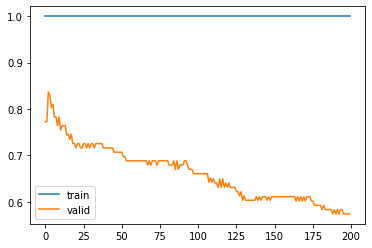

In [0]:
score_list = []
train_list = []
trials = 200
for x in np.arange(1,trials+1):
  train, score = train_KNN(x, X_train_ACL, train_ACL_labels, X_valid_ACL, valid_ACL_labels)
  score_list.append(score)
  train_list.append(train)
plt.figure(0)
plt.plot(np.arange(trials), train_list, label='train')
plt.plot(np.arange(trials), score_list, label='valid')
plt.legend()
plt.show()

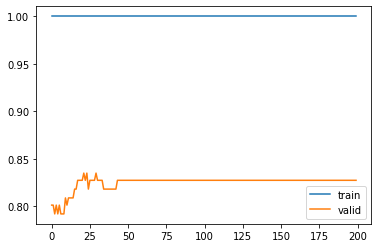

In [0]:
score_list = []
train_list = []
trials = 200
for x in np.arange(1,trials+1):
  train, score = train_KNN(x, X_train_ACL[:,0:3], train_ACL_labels, X_valid_ACL[:,0:3], valid_ACL_labels)
  score_list.append(score)
  train_list.append(train)
plt.figure(0)
plt.plot(np.arange(trials), train_list, label='train')
plt.plot(np.arange(trials), score_list, label='valid')
plt.legend()
plt.show()

In [0]:
score_list = []
train_list = []
trials = 200
for x in np.arange(1,trials+1):
  train, score = train_KNN(x, X_train_meniscus, train_meniscus_labels, X_valid_meniscus, valid_meniscus_labels)
  score_list.append(score)
  train_list.append(train)
plt.figure(0)
plt.plot(np.arange(trials), train_list, label='train')
plt.plot(np.arange(trials), score_list, label='valid')
plt.legend()
plt.show()

NameError: ignored

In [0]:
score_list = []
train_list = []
trials = 200
for x in np.arange(1,trials+1):
  train, score = train_KNN(x, X_train_meniscus[:,0:3], train_meniscus_labels, X_valid_meniscus[:,0:3], valid_meniscus_labels)
  score_list.append(score)
  train_list.append(train)
plt.figure(0)
plt.plot(np.arange(trials), train_list, label='train')
plt.plot(np.arange(trials), score_list, label='valid')
plt.legend()
plt.show()

In [0]:
score_list = []
train_list = []
trials = 200
for x in np.arange(1,trials+1):
  train, score = train_KNN(x, X_train_abnormal, train_abnormal_labels, X_valid_abnormal, valid_abnormal_labels)
  score_list.append(score)
  train_list.append(train)
plt.figure(0)
plt.plot(np.arange(trials), train_list, label='train')
plt.plot(np.arange(trials), score_list, label='valid')
plt.legend()
plt.show()

In [0]:
score_list = []
train_list = []
trials = 200
for x in np.arange(1,trials+1):
  train, score = train_KNN(x, X_train_abnormal[:,0:3], train_abnormal_labels, X_valid_abnormal[:,0:3], valid_abnormal_labels)
  score_list.append(score)
  train_list.append(train)
plt.figure(0)
plt.plot(np.arange(trials), train_list, label='train')
plt.plot(np.arange(trials), score_list, label='valid')
plt.legend()
plt.show()

In [0]:
from sklearn.linear_model import SGDClassifier

def train_SGD(lossx, X_train, Y_train, X_valid, Y_valid):
  sgd = SGDClassifier(loss=lossx, class_weight="balanced", n_iter_no_change=20)
  sgd.fit(X_train, Y_train)
  print(lossx + " train score: ", sgd.score(X_train, Y_train))
  y_valid_preds = sgd.predict(X_valid)
  auc = metrics.roc_auc_score(Y_valid, y_valid_preds)
  print(lossx + ' valid auc: ', auc)
  return

In [0]:
loss_list = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']

for loss in loss_list:
  train_SGD(loss, X_train_ACL, train_ACL_labels, X_valid_ACL, valid_ACL_labels)

hinge train score:  1.0
hinge valid auc:  0.8089225589225589
log train score:  1.0
log valid auc:  0.8089225589225589
modified_huber train score:  1.0
modified_huber valid auc:  0.8181818181818181
squared_hinge train score:  1.0
squared_hinge valid auc:  0.8274410774410774
perceptron train score:  1.0
perceptron valid auc:  0.8181818181818181
squared_loss train score:  0.43
squared_loss valid auc:  0.5867003367003367
huber train score:  0.811
huber valid auc:  0.5
epsilon_insensitive train score:  0.812
epsilon_insensitive valid auc:  0.5
squared_epsilon_insensitive train score:  0.81
squared_epsilon_insensitive valid auc:  0.49242424242424243


In [0]:
loss_list = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']

for loss in loss_list:
  train_SGD(loss, X_train_ACL[:,0:3], train_ACL_labels, X_valid_ACL[:,0:3], valid_ACL_labels)

hinge train score:  1.0
hinge valid auc:  0.7904040404040404
log train score:  1.0
log valid auc:  0.8106060606060606
modified_huber train score:  1.0
modified_huber valid auc:  0.8164983164983165
squared_hinge train score:  1.0
squared_hinge valid auc:  0.8106060606060606
perceptron train score:  1.0
perceptron valid auc:  0.8106060606060606
squared_loss train score:  1.0
squared_loss valid auc:  0.8122895622895623
huber train score:  0.998
huber valid auc:  0.8215488215488216
epsilon_insensitive train score:  0.999
epsilon_insensitive valid auc:  0.8122895622895623
squared_epsilon_insensitive train score:  1.0
squared_epsilon_insensitive valid auc:  0.8198653198653199


In [0]:
from sklearn.svm import SVC

def train_SVC(lossx, X_train, Y_train, X_valid, Y_valid):
  svc = SVC(kernel=lossx)
  svc.fit(X_train, Y_train)
  print(lossx + " train score: ", svc.score(X_train, Y_train))
  y_valid_preds = svc.predict(X_valid)
  auc = metrics.roc_auc_score(Y_valid, y_valid_preds)
  print(lossx + ' valid auc: ', auc)
  return

In [0]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernel_list:
  train_SVC(kernel, X_train_ACL, train_ACL_labels, X_valid_ACL, valid_ACL_labels)

linear train score:  1.0
linear valid auc:  0.7996632996632997
poly train score:  1.0
poly valid auc:  0.7996632996632997
rbf train score:  0.998
rbf valid auc:  0.8089225589225589
sigmoid train score:  0.805
sigmoid valid auc:  0.5277777777777778


In [0]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernel_list:
  train_SVC(kernel, X_train_ACL[:,0:3], train_ACL_labels, X_valid_ACL[:,0:3], valid_ACL_labels)

linear train score:  1.0
linear valid auc:  0.7920875420875422
poly train score:  1.0
poly valid auc:  0.8089225589225589
rbf train score:  1.0
rbf valid auc:  0.7920875420875422
sigmoid train score:  0.669
sigmoid valid auc:  0.5774410774410774


In [0]:
from sklearn.linear_model import LogisticRegressionCV

def train_LogCV(X_train, Y_train, X_valid, Y_valid):
  LogCV = LogisticRegressionCV(class_weight='balanced', max_iter=10000000)
  LogCV.fit(X_train, Y_train)
  print(" train score: ", LogCV.score(X_train, Y_train))
  y_valid_preds = LogCV.predict(X_valid)
  auc = metrics.roc_auc_score(Y_valid, y_valid_preds)
  print(' valid auc: ', auc)
  return

In [0]:
train_LogCV(X_train_ACL[:,0:3], train_ACL_labels, X_valid_ACL[:,0:3], valid_ACL_labels)

train_LogCV(X_train_ACL, train_ACL_labels, X_valid_ACL, valid_ACL_labels)

 train score:  1.0
 valid auc:  0.8198653198653199
 train score:  1.0
 valid auc:  0.8274410774410774


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def train_combo(epochs, ax_train, sag_train, cor_train, ground_truth_train, ax_valid, sag_valid, cor_valid, ground_truth_valid):
  #init
  valid_baseline_auc = 0
  rfc = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                               min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                               warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
  #updated_rfc = rfc
  
  X = np.concatenate((np.expand_dims(np.array(ax_train),axis=1), np.expand_dims(np.array(sag_train),axis=1), 
                      np.expand_dims(np.array(cor_train),axis=1)), axis=1)
  print('X shape', X.shape)
  y = np.array(ground_truth_train)
  print('Y shape', y.shape)
  auclist = []

  for epoch in range(epochs):
    old_rfc = rfc
    cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
    fprs, tprs, scores = [], [], []
    #fpr, tpr, threshold = metrics.roc_curve(labels, preds)
    #print("threshold is: ", threshold)
    #auc = metrics.auc(fpr, tpr)

    #for (train, test), i in zip(cv.split(X, y), range(5)):
    #    rfc.fit(X[train], y[train])
        #_, _, auc_score_train = compute_roc_auc(train)
        #fpr, tpr, auc_score = compute_roc_auc(test)
    #    y_preds = rfc.predict(X[test])
    #    fpr, tpr, threshold = metrics.roc_curve(y[test], y_preds)
    #    auc = metrics.auc(fpr, tpr)
    #    scores.append(auc)
    #    fprs.append(fpr)
    #    tprs.append(tpr)
    rfc.fit(X, y)

    #print('epoch ' + str(epoch), scores)
    X_valid = np.concatenate((np.expand_dims(np.array(ax_valid),axis=1), np.expand_dims(np.array(sag_valid),axis=1), 
                        np.expand_dims(np.array(cor_valid),axis=1)), axis=1)
    #print('X shape', X_valid.shape)
    y_valid = np.array(ground_truth_valid)
    #print('Y shape', y_valid.shape)
    y_valid_preds = rfc.predict(X_valid)
    fpr, tpr, threshold = metrics.roc_curve(y_valid, y_valid_preds)
    auc = metrics.auc(fpr, tpr)
    print('valid epoch ' + str(epoch), auc)

    if auc > valid_baseline_auc:
      valid_baseline_auc = auc
    else:
      rfc = old_rfc

    auclist.append(auc)

  return rfc, auclist

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def train_gridsearch(ax_train, sag_train, cor_train, ground_truth_train, ax_valid, sag_valid, cor_valid, ground_truth_valid):

  X = np.concatenate((np.expand_dims(np.array(ax_train),axis=1), np.expand_dims(np.array(sag_train),axis=1), 
                      np.expand_dims(np.array(cor_train),axis=1)), axis=1)
  y = np.array(ground_truth_train)

  n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
  max_features = ['auto', 'sqrt']
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  min_samples_split = [2, 5, 10]
  min_samples_leaf = [1, 2, 4]
  bootstrap = [True, False]
  random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

  rfc = RandomForestClassifier()
  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  # Fit the random search model
  rfc_random.fit(X, y)

  X_valid = np.concatenate((np.expand_dims(np.array(ax_valid),axis=1), np.expand_dims(np.array(sag_valid),axis=1), 
                        np.expand_dims(np.array(cor_valid),axis=1)), axis=1)
  #print('X shape', X_valid.shape)
  y_valid = np.array(ground_truth_valid)
  #print('Y shape', y_valid.shape)
  y_valid_preds = rfc_random.predict(X_valid)
  fpr, tpr, threshold = metrics.roc_curve(y_valid, y_valid_preds)
  auc = metrics.auc(fpr, tpr)
  print('valid auc ' , auc)

  return rfc_random

In [0]:
# ACL
ACL_train_axial_preds = predslist_ACL[0][0]
ACL_train_sagittal_preds = predslist_ACL[1][0]
ACL_train_coronal_preds = predslist_ACL[2][0]

ACL_valid_axial_preds = predslist_ACL[3][0]
ACL_valid_sagittal_preds = predslist_ACL[4][0]
ACL_valid_coronal_preds = predslist_ACL[5][0]

#print(ACL_train_axial_preds)
#print(len(ACL_train_axial_preds), len(ACL_train_sagittal_preds), len(ACL_train_coronal_preds), len(train_ACL_labels))

rfc_random = train_gridsearch(ACL_train_axial_preds, ACL_train_sagittal_preds, ACL_train_coronal_preds, train_ACL_labels, 
                      ACL_valid_axial_preds, ACL_valid_sagittal_preds, ACL_valid_coronal_preds, valid_ACL_labels)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.2s finished


valid auc  0.8106060606060606


In [0]:
from sklearn.neural_network import MLPClassifier

def train_nn(ax_train, sag_train, cor_train, ground_truth_train, ax_valid, sag_valid, cor_valid, ground_truth_valid):
  X_train = np.concatenate((np.array(ax_train), np.array(sag_train), np.array(cor_train)), axis=1)
  Y_train = np.array(ground_truth_train)
  X_valid = np.concatenate((np.array(ax_valid), np.array(sag_valid), np.array(cor_valid)), axis=1)
  Y_valid = np.array(ground_truth_valid)

  clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
  clf.fit(X_train, y_train)

  print("score", clf.score)
  y_pred = clf.predict(X_valid)
  fpr, tpr, threshold = metrics.roc_curve(Y_valid, y_pred)
  auc = metrics.auc(fpr, tpr)
  print('auc', auc)
  return X_train, Y_train

In [0]:
ACL_train_axial_preds = predslist_ACL[0][0]
ACL_train_sagittal_preds = predslist_ACL[1][0]
ACL_train_coronal_preds = predslist_ACL[2][0]

ACL_valid_axial_preds = predslist_ACL[3][0]
ACL_valid_sagittal_preds = predslist_ACL[4][0]
ACL_valid_coronal_preds = predslist_ACL[5][0]

x_train, y_train = train_nn(ACL_train_axial_preds, ACL_train_sagittal_preds, ACL_train_coronal_preds, train_ACL_labels, 
                      ACL_valid_axial_preds, ACL_valid_sagittal_preds, ACL_valid_coronal_preds, valid_ACL_labels)

AxisError: ignored

In [0]:
# neural net try 2

# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)


# Create function returning a compiled network
def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

features = x_train
target = y_train

cross_val_score(neural_network, features, target, cv=3)

In [0]:
def linechart(x, y, title, xlabel, ylabel):
  plt.figure()
  plt.title(title)
  plt.plot(x, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  return

In [0]:
%matplotlib inline
linechart(np.arange(1000), np.array(auclist), 'title', 'epoch', 'auc')

In [0]:
def test_rfc(rfc, ax_pred, sag_pred, cor_pred, ground_truth):
  rfc_test = rfc
  X = np.concatenate((np.expand_dims(np.array(ax_pred),axis=1), np.expand_dims(np.array(sag_pred),axis=1), 
                      np.expand_dims(np.array(cor_pred),axis=1)), axis=1)
  print('X shape', X.shape)
  y = np.array(ground_truth)
  print('Y shape', y.shape)
  y_preds = rfc.predict(X)
  fpr, tpr, threshold = metrics.roc_curve(y, y_preds)
  auc = metrics.auc(fpr, tpr)
  return fpr, tpr, auc

In [0]:
a, b, c = test_rfc(acl_rfc, predslist_ACL[3][0], predslist_ACL[4][0], predslist_ACL[5][0], valid_ACL_labels)

print(a, b, c)

In [0]:
def test_meme(threshold, ax_pred, sag_pred, cor_pred, ground_truth):
  X = np.concatenate((np.expand_dims(np.array(ax_pred),axis=1), np.expand_dims(np.array(sag_pred),axis=1), 
                      np.expand_dims(np.array(cor_pred),axis=1)), axis=1)
  print('X shape', X.shape)
  y = np.array(ground_truth)
  print('Y shape', y.shape)
  newX = np.divide(np.sum(X, axis=1), 3)
  for index in range(newX.shape[0]):
    if round(newX[index]) > threshold:
      print('memes')
      newX[index] = 1
    else:
      newX[index] = 0    
  fpr, tpr, threshold = metrics.roc_curve(y, newX)
  auc = metrics.auc(fpr, tpr)
  return fpr, tpr, auc

In [0]:
#thresholds = np.divide(np.arange(10), 10)
thresholds = [1.0]
print(thresholds)

for threshold in thresholds:
  print(threshold)
  a, b, c = test_meme(threshold, predslist_ACL[3][0], predslist_ACL[4][0], predslist_ACL[5][0], valid_ACL_labels)
  print(a, b, c)

In [0]:
from sklearn.neural_network import MLPClassifier

def train_combo(diagnosis, ax_pred, sag_pred, cor_pred, ground_truth):
  X = np.concatenate((np.array(ax_pred), np.array(sag_pred), np.array(cor_pred)), axis=1)
  Y = 

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(5, 2), random_state=1)
...
>>> clf.fit(X, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)